# **Alumno:** Niño Pedraza Eduardo


# **c) Iteradas de Picard**
Calcula las primeras 3 iteradas de Picard para $\frac{dy}{dx} = y^2$, $y(0)=\frac{1}{2}$


La formulación integral: $y_{n+1}(x) = y_0 + \int_{0}^{x} y_n(t)^2 dt$

x    y0 (iter0)    y1 (iter1)    y2 (iter2)    y3 (iter3)
0.50  0.500000   0.500000   0.500000   0.500000
1.00  0.500000   0.625628   0.659837   0.666637
1.51  0.500000   0.751256   0.898666   0.968529
1.99  0.500000   0.873744   1.222723   1.515642
2.50  0.500000   0.999372   1.664159   2.556571
3.00  0.500000   1.125000   2.231775   4.455099
---------------------------------------------------------------------------------------------------------


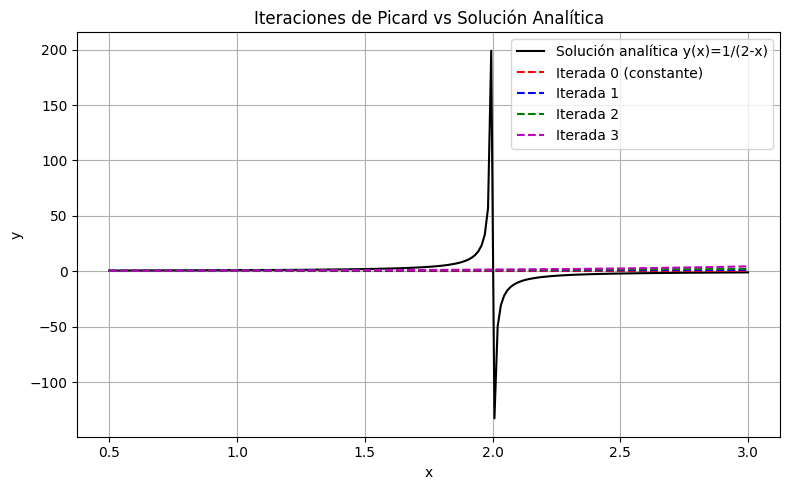

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Condición inicial
y0 = 1/2

# Dominio para evaluar
xs = np.linspace(0.5, 3.0, 200)

# Iterada 0: constante = condición inicial
y0_vec = np.full_like(xs, y0)

# Función auxiliar: integración por trapecio acumulada
def picard_step(xs, y_n):
    y2 = y_n**2
    ys_next = np.empty_like(xs)
    ys_next[0] = y0
    cumint = np.zeros_like(xs)
    for i in range(1, len(xs)):
        h = xs[i] - xs[i-1]
        cumint[i] = cumint[i-1] + 0.5 * h * (y2[i-1] + y2[i])
        ys_next[i] = y0 + cumint[i]
    return ys_next

# Calcular iteradas
y1_vec = picard_step(xs, y0_vec)   # primera iterada
y2_vec = picard_step(xs, y1_vec)   # segunda iterada
y3_vec = picard_step(xs, y2_vec)   # tercera iterada

# Imprimir valores en algunos puntos clave
puntos = [0.5, 1, 1.5, 2, 2.5,3]
print("x    y0 (iter0)    y1 (iter1)    y2 (iter2)    y3 (iter3)")
for xpt in puntos:
    i = int(round((xpt - xs[0]) / (xs[-1]-xs[0]) * (len(xs)-1)))
    print(f"{xs[i]:.2f}  {y0_vec[i]:.6f}   {y1_vec[i]:.6f}   {y2_vec[i]:.6f}   {y3_vec[i]:.6f}")
print('---------------------------------------------------------------------------------------------------------')

# Solución analítica: y(x) = 1 / (2 - x)
y_exact = 1.0 / (2.0 - xs)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(xs, y_exact, 'k-', label='Solución analítica y(x)=1/(2-x)')
plt.plot(xs, y0_vec, 'r--', label='Iterada 0 (constante)')
plt.plot(xs, y1_vec, 'b--', label='Iterada 1')
plt.plot(xs, y2_vec, 'g--', label='Iterada 2')
plt.plot(xs, y3_vec, 'm--', label='Iterada 3')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Iteraciones de Picard vs Solución Analítica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("picard_iteradas.png", dpi=200)
plt.show()

Vemos que justamente en $x=2$ como habíamos analizado tenemos un punto en el que las soluciones explotan, , vemos que en los demás puntos fuera de ese, tenemos un comportamiento bueno por parte de las iteradas.

# **d) Error de truncamiento**

/tmp/ipython-input-4237799080.py:18: RuntimeWarning: divide by zero encountered in divide
  return 1.0 / (2.0 - x)


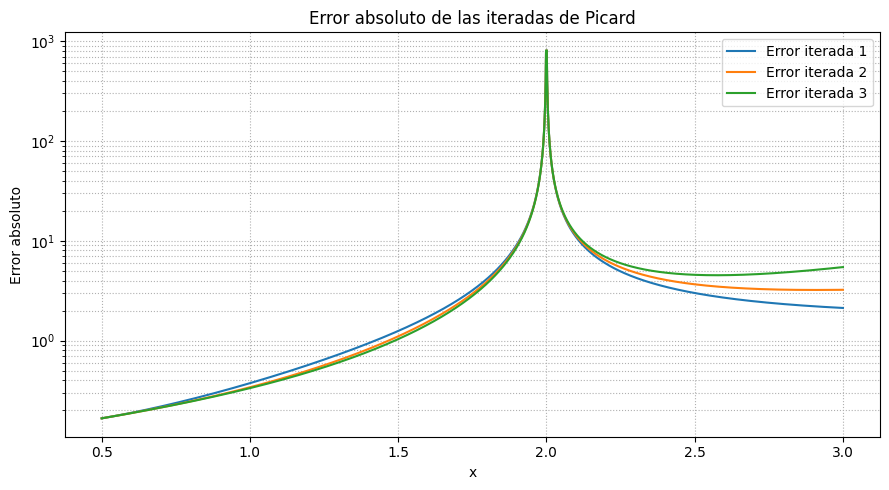

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Parametros
y0 = 0.5
x_min, x_max = 0.5, 3.0
nx = 2001             # puntos en la malla
xs = np.linspace(x_min, x_max, nx)
m_iters = 4         # calcula iteradas 0 .. m_iters-1

# Rigidices de salida
save_figures = True
out_prefix = "picard"

# Solución exacta
def y_exact(x):
    return 1.0 / (2.0 - x)

y_ex = y_exact(xs)

def picard_step(xs, y_n):
    y2 = y_n**2
    cumint = np.zeros_like(xs)
    for i in range(1, len(xs)):
        h = xs[i] - xs[i-1]
        cumint[i] = cumint[i-1] + 0.5 * h * (y2[i-1] + y2[i])
    return y0 + cumint

# Calcular iteradas
iterates = []
y_prev = np.full_like(xs, y0)   # iterada 0
iterates.append(y_prev.copy())

for k in range(1, m_iters):
    y_next = picard_step(xs, y_prev)
    iterates.append(y_next.copy())
    y_prev = y_next

# Gráfica: errores absolutos de cada iterada
plt.figure(figsize=(9,5))
for k, yk in enumerate(iterates[1:], start=1):  # omitimos iterada 0 si se desea
    err = np.abs(yk - y_ex)
    plt.plot(xs, err, label=f'Error iterada {k}')
plt.yscale('log')
plt.xlabel('x'); plt.ylabel('Error absoluto')
plt.title('Error absoluto de las iteradas de Picard')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
if save_figures:
    plt.savefig(f"{out_prefix}_errors_log.png", dpi=200)
plt.show()

El error crece de forma marcada cuando nos vamos moviendo de $x=0.5$ hasta $x=2^{-}$. Esto pasa porque la solución exacta también crece mucho al acercarse a $𝑥=2$. Aunque las iteradas de Picard convergen para  $x$ pequeño, cerca de la singularidad dejan de ser buenas aproximaciones.

En $x=2$ la solución exacta es infinita, mientras que cada iterada de Picard sigue siendo una función polinómica (finita). Por eso el error tiende a infinito en ese punto.

Entre $x=2^{+}$ y $x=3$. Como la solución exacta cambia de signo , las iteradas de Picard no pueden seguirla bien. El error se estabiliza en valores grandes. De hecho, las iteradas ya no convergen después de la singularidad: el método de Picard solo tiene sentido en el intervalo donde existe solución único, antes de $x=2$